In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [2]:
zoo = pd.read_csv("Zoo.csv")
zoo.head(10)


,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
5,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
6,calf,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1
7,carp,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4
8,catfish,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
9,cavy,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0,1


In [3]:
zoo["animal name"].value_counts()

frog        2
pony        1
sealion     1
seal        1
seahorse    1
           ..
gorilla     1
goat        1
gnat        1
girl        1
wren        1
Name: animal name, Length: 100, dtype: int64

In [4]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [5]:
zoo.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [6]:
# Encoding the categorical:-
df = pd.get_dummies(zoo["animal name"])

In [7]:
df1 = zoo.drop(columns = "animal name")

In [8]:
df2 = pd.concat([df,df1],axis = 1)
print(df2.shape)
df2.sample(10)

(101, 117)


,aardvark,antelope,bass,bear,boar,buffalo,calf,carp,catfish,cavy,...,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
38,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,1,0,1,0,0,4
24,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,6,0,0,0,6
20,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,2,1,1,0,2
33,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,2,1,0,0,2
79,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,2,1,0,0,2
84,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,2,1,0,0,1
55,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,4,1,0,1,1
99,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,7
31,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,4,1,1,1,1
63,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,4,1,0,1,1


In [9]:
X = df2.iloc[:,0:117] # Feature

In [10]:
Y = df2.iloc[:,-1] # Target
Y.value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64

# Scaling the Dataset:-

In [11]:
from sklearn.preprocessing import MinMaxScaler
mm= MinMaxScaler()
x_scaled = mm.fit_transform(X)
# Need not to scaled Categorical column i.e. Target.

# Spliting the Dataset for trainin and testing:-

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x_scaled,Y,test_size=0.3,random_state=23)

In [13]:
# kfold = KFold(n_splits=4)
# results = cross_val_score(model, X, Y, cv=kfold)

# print(results.mean())

In [14]:
model = KNeighborsClassifier(n_neighbors=13) # "n_neighbors" indicate the value of "K" which is randomly choosen as 13. 
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=13)

In [15]:
y_pred = model.predict(x_test) # Predicting the value at teesting data data.
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)


0.8709677419354839

In [16]:
kfold= KFold(n_splits =4)
result = cross_val_score(model,x_train,y_train,cv=kfold)
print(result.mean())

print(result.std()) #
print(pd.DataFrame(result).skew())

0.7295751633986928
0.16263506202136366
0    0.251466
dtype: float64


[0.55555556 0.83333333 0.94117647 0.58823529]


C:\Users\rhtmi\anaconda last\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

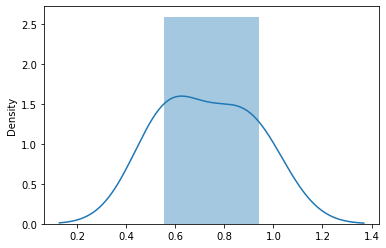

In [17]:
import seaborn  as sns
print(result)
sns.distplot(result)

In [18]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred)
print (confusion_matrix)

[[12  0  0  0  0  0  0]
 [ 0  6  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  5  0  0  0]
 [ 0  0  1  0  0  0  0]
 [ 0  0  0  0  0  1  0]
 [ 0  0  0  0  0  3  3]]


C:\Users\rhtmi\anaconda last\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


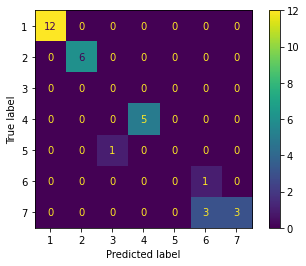

In [19]:
from sklearn.metrics import plot_confusion_matrix
# plt.figure(figsize=(70, 70))
plot_confusion_matrix(model, x_test, y_test  )
plt.show()

In [1]:
 # Grid Search for Algorithm Tuning
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [22]:
n_neighbors = np.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)


In [23]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(x_train, y_train)

C:\Users\rhtmi\anaconda last\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [25]:
print(grid.best_params_)


{'n_neighbors': 1}


In [27]:
model = KNeighborsClassifier(n_neighbors=1) # "n_neighbors" indicate the value of "K" which is randomly choosen as 1 got from hyperparametric tunning. 
model.fit(x_train,y_train)
y_pred = model.predict(x_test) # Predicting the value at teesting data data.
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.9032258064516129

In [28]:
kfold= KFold(n_splits =4)
result = cross_val_score(model,x_train,y_train,cv=kfold)
print(result.mean())


0.97140522875817


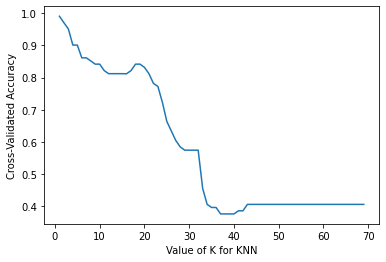

In [31]:
 ## Visualizing the CV results
import matplotlib.pyplot as plt 
get_ipython().run_line_magic('matplotlib', 'inline')
# choose k between 1 to 70
k_range = range(1, 70)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=4)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()